# Simple Linear Reegression Model (How height affects the weight)
### Author : MD. Mehedi Hassan Galib
### Date : 31 July, 2020

<br/>
<br/>
<br/>

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the dataset

In [2]:
df = pd.read_csv("C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/student_info.csv")
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


## Reconnaissance

In [3]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [4]:
df.shape

(200, 2)

## Dealing with NULL values

In [5]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [6]:
df2 = df.fillna(df.mean())

In [7]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

## Observing the relation between variables

In [8]:
df2.corr()

,study_hours,student_marks
study_hours,1.000000,0.978696
student_marks,0.978696,1.000000


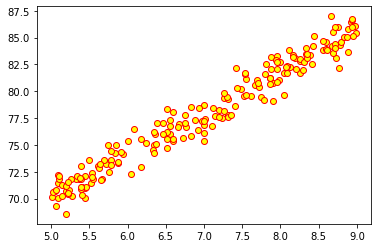

In [9]:
plt.scatter(df2.study_hours,df2.student_marks, color = "yellow", edgecolor = "Red")
plt.show()

## Split explanatory and response variable

In [10]:
X = pd.DataFrame(df2['study_hours'])
y = pd.DataFrame(df2['student_marks'])

## Split train and test dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 51)

## Model build up

In [12]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

## Prediction

In [13]:
y_predict = lm.predict(X_test)
y_predict

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

# Create a new dataframe

In [14]:
pd.DataFrame(np.c_[X_test, y_test, y_predict], columns = ['study_hours','actual_mark','predicted mark'])

,study_hours,actual_mark,predicted mark
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


## Predict a single data point
#### [0[0] - extraxt data from 2D array

In [15]:
predict1 = lm.predict([[10]])[0][0].round(2)
predict1

89.8

# R-squared value

In [16]:
lm.score(X_train, y_train)

0.9589875741425085

# plotting the model

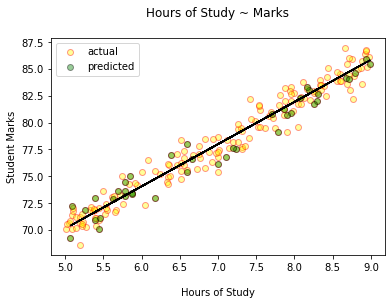

In [17]:
plt.scatter(df2.study_hours,df2.student_marks, color = "yellow", edgecolor = "Red",alpha = 0.4, label = 'actual')
plt.scatter(X_test, y_test, color = "green", edgecolor = "black",alpha = 0.4,  label = "predicted" )
plt.plot(X_test, y_predict, color = "Black")
plt.xlabel('\nHours of Study')
plt.ylabel('Student Marks')
plt.title('Hours of Study ~ Marks\n')
plt.legend()
plt.show()